#### 一、什么是NumPy
NumPy是一个功能强大的Python库，主要用于对多维数组执行计算，NumPy这个词不源于两个单词-Numerical和Pyton.NumPy提供了大量的库函数和操作，可以帮助程序员轻松地进行数值计算，这类数值计算广泛用于以下任务：
- 机器学习模型：在编写机器学习算法时，需要对矩阵进行各种数值计算，例如矩阵乘法、换位、加法等，NumPy提供了一个非常好的库，用于简单(在编写代码方面)和快速(在执行速度方面)的矩阵运算。NumPy数组用于存储训练数据和机器学习模型的参数。
- 图像处理和计算机图形学：计算机中的图像表示为多维数字矩阵，NumPy成为同样情况下最自然的选择，实际上，NumPy提供了一些优秀的库函数来快速处理图像，例如，镜像图像、按特定角度旋转图像等
- 数学任务：NumPy对于执行各种数学任务非常有用，如数值积分、内插、外推等，因此，当涉及到数学任务时，它形成了一种基于Python的MATLAB的快速替代

#### 二、NumPy对象
从ndarray对象提取的任何元素(通过切片)由一个数组标量类型的Python对象表示，下图显示了ndarray,数据类型对象(dtype)和数组标量类型之间的关系：

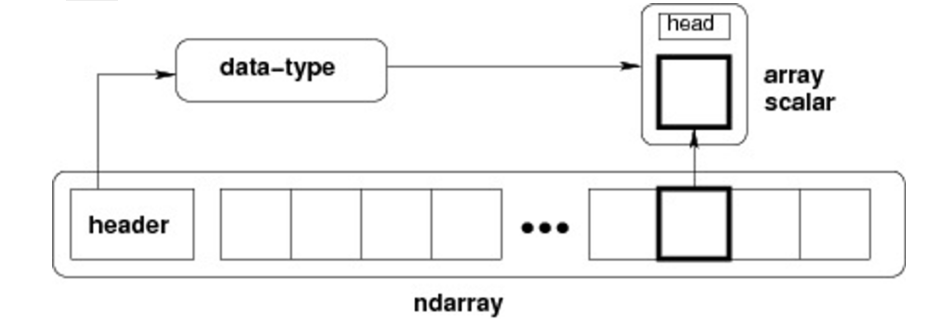

In [4]:
from IPython.display import Image
Image(filename='./imgs/day1-01.jpg')

它从任何暴露数组接口的对象，或从返回数组的任何方法创建一个ndarray
numpy.array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)

#### 参数说明

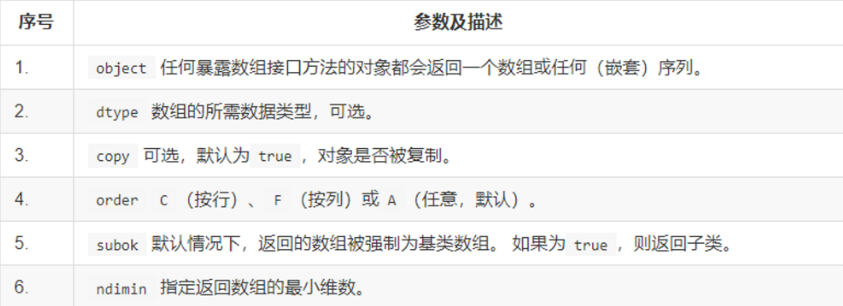

In [5]:
Image(filename="./imgs/day01-02.png")

#### 三、安装numpy
- 安装numpy
!pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple
- 安装jupyter
!pip install jupyter notebook -i https://pypi.tuna.tsinghua.edu.cn/simple

#### 四、基础用法
4.1 为什么要用numpy
比如：我要针对一个数组的元素都乘以2,有2种做法

In [7]:
import numpy as np
# 方法一
num_list = [1,2,3,4,5,6]
ret_list = []
for num in num_list:
    ret_list.append(num*2)
print(ret_list)
print("-------------------------")

# 方案二
np_array = np.array(num_list)
print(np_array*2)

[2, 4, 6, 8, 10, 12]
-------------------------
[ 2  4  6  8 10 12]


#### 4.2、各维度数据定义

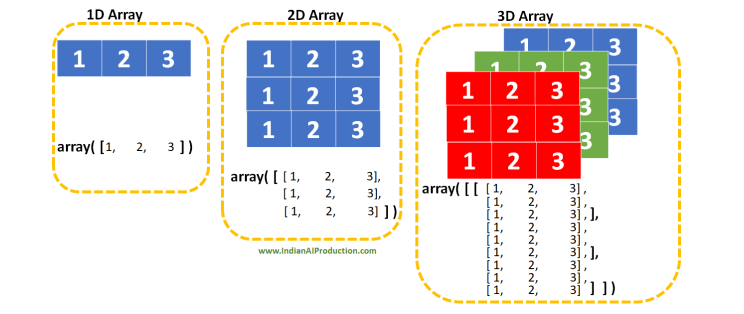

In [8]:
Image(filename='./imgs/day01-03.png')

In [11]:
# 创建ndarray数据
# 一维数组
a = np.array([1,2,3])
a_ = np.array((1,2,3))

# 二维数组
b = np.array([[1,2],[3,4]])

# 三维数组
c = np.array([[[1,2],[3,4]],[[1,2],[3,4]]])
print(a)
print("\n")
print(a_)
print("\n")
print(b)
print("\n")
print(c)

[1 2 3]


[1 2 3]


[[1 2]
 [3 4]]


[[[1 2]
  [3 4]]

 [[1 2]
  [3 4]]]


#### 4.3 查看数组信息

In [12]:
print(a.shape)
print("\n")
print(b.shape)
print("\n")
print(c.shape)

(3,)


(2, 2)


(2, 2, 2)


#### 五、数据类型
5.1、NumPy数据类型
NumPy支持比Python更多种类的数值类型，下表显示了NumPy中定义不同标量数据类型

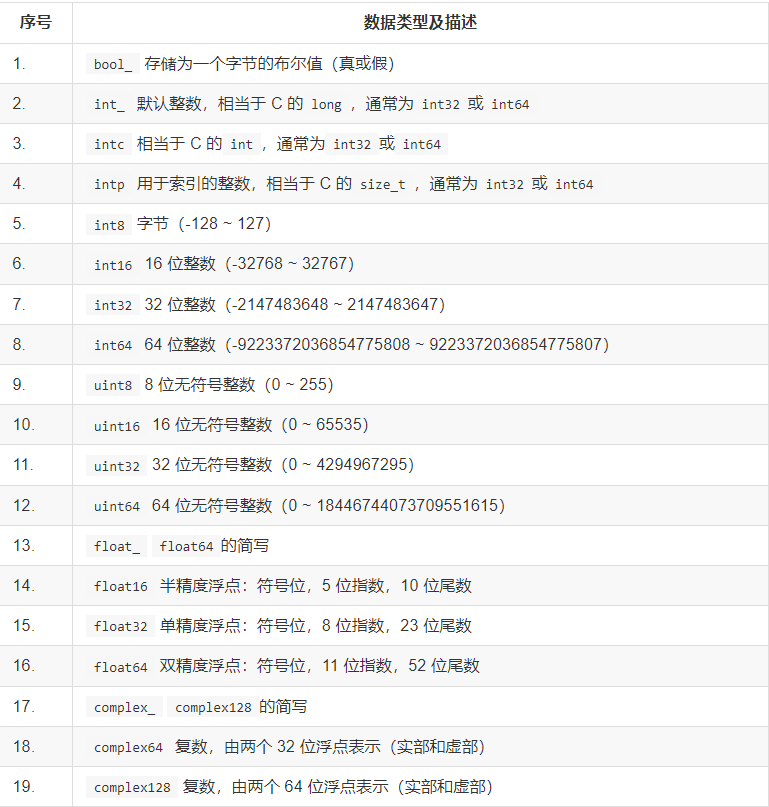

In [13]:
Image(filename="./imgs/day01-04.png")

NumPy数字类型是dtype(数据类型)对象的实例，每个对象具有唯一的特征

#### 5.2、类型对象(dtype)
dtype可由语法构造
numpy.dtype(object, align, copy)
参数为：
- object：被转换为数据类型的对象
- align: 如果为True,则向字段添加间隔，使其类似C的结构体
- copy: 生成dtype对象的新副本，如果为flase,结果是内建数据类型对象的引用

In [14]:
# 使用数组标量类型
# int8 int16 int32 int64可替换为等价的字符器'i1','i2','i4'以及其他
dt = np.dtype(np.int32)
dt_ = np.dtype('i4')
print(dt)
print("\n")
print(dt_)

int32


int32


In [15]:
# 创建结构化数据类型
dt = np.dtype([('age', np.int8)])
a = np.array([(10,),(20,),(30,)], dtype=dt)
print(dt)
print(a['age'])

[('age', 'i1')]
[10 20 30]


In [17]:
dt.shape
#a.shape

()

#### 5.4、常量（只需有印象即可)
常用常量如下：

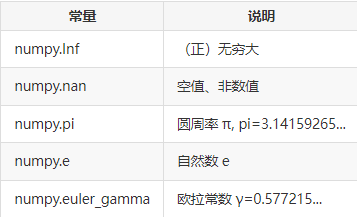

In [18]:
Image(filename="./imgs/day01-05.png")

In [19]:
# 无穷大 inf
print(np.inf)
# 它是一个浮点数
print(type(np.inf))
#float
a = np.array([np.inf, -np.inf, 1])
# 显示哪些元素是正无穷或负无穷大
np.isinf(a)

inf
<class 'float'>


array([ True,  True, False])

In [20]:
#自然数 e
print(type(np.e))
# float
print(np.e)

<class 'float'>
2.718281828459045


In [21]:
# 圆周率
print(type(np.pi))
print(np.pi)

<class 'float'>
3.141592653589793


#### 5.5 广播
广播(Array Broadcasting):描述的是NumPy如何计算不同形状的数组之间的运算，如果是较大的矩阵和较小的矩阵进行运算的话，较小的矩阵会被广播，从而保证运算的正确进行
如果满足以下规则，可进行广播
- ndim较小的数组会在前面追加一个长度为1的维度
- 输出数组的每个维度的大小是输入数组该维度大小的最大值
- 如果输入在每个维度中的大小与输出大小匹配，或其值正好为1
- 如果输入的某个维度的大小为1，则该维度中的第一个数据元素将用于该维度的所有计算

如果上述规则产生有效结果，并且满足以下条件之一，那么数组称为可广播的
- 数组拥有相同的形状
- 数组拥有相同的维数，每个维度拥有相同长度，或者长度为1
- 数组拥有极少的维度，可以在其前面追加长度为1的维度，使上述条件成立

In [25]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]])
print(f"a.shape:",a.shape)
b = np.array([1.0, 2.0, 3.0])
print(f"b.shape:", b.shape)
print('第一个数组')
print(a)
print("\n")
print("第二个数组")
print(b)
print("\n")
print("\n")
print("两个数组相加")
print(a+b)
print("\n")

a.shape: (4, 3)
b.shape: (3,)
第一个数组
[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]


第二个数组
[1. 2. 3.]




两个数组相加
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]




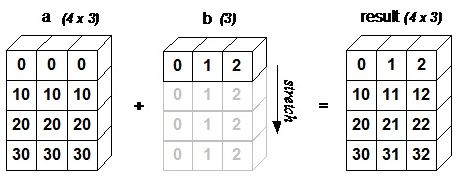

In [23]:
Image(filename="./imgs/day01-06.png")

In [26]:
print(a+1)

[[ 1.  1.  1.]
 [11. 11. 11.]
 [21. 21. 21.]
 [31. 31. 31.]]
